### <h1 style="text-align:center">Deep Learning   </h1>
<h1 style="text-align:center"> Lab Session 2 - 3 Hours </h1>
<h1 style="text-align:center"> Convolutional Neural Network (CNN) for Handwritten Digits Recognition</h1>

<b> Student 1:</b> Matteo Fiore 
<b> Student 2:</b> Hanna Johansson
 
 
The aim of this session is to practice with Convolutional Neural Networks. Answers and experiments should be made by groups of one or two students. Each group should fill and run appropriate notebook cells. 


Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an pdf document using print as PDF (Ctrl+P). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by May 29th 2017.

Send you pdf file to benoit.huet@eurecom.fr and olfa.ben-ahmed@eurecom.fr using **[DeepLearning_lab2]** as Subject of your email.

# Introduction

In the last Lab Session, you built a Multilayer Perceptron for recognizing hand-written digits from the MNIST data-set. The best achieved accuracy on testing data was about 97%.  Can  you do better than these results using a deep CNN ?
In this Lab Session, you will build, train and optimize in TensorFlow one of the early Convolutional Neural Networks:  **LeNet-5** to go to  more than 99% of accuracy. 






# Load MNIST Data in TensorFlow
Run the cell above to load the MNIST data that comes  with TensorFlow. You will use this data in **Section 1** and **Section 2**.

In [42]:
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels
print("Image Shape: {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Image Shape: (784,)
Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


# Section 1 : My First Model in TensorFlow

Before starting with CNN, let's train and test in TensorFlow the example :
**y=softmax(Wx+b)** seen in the DeepLearing course last week. 

This model reaches an accuracy of about 92 %.
You will also learn how to launch the tensorBoard https://www.tensorflow.org/get_started/summaries_and_tensorboard to  visualize the computation graph, statistics and learning curves. 

<b> Part 1 </b> : Read carefully the code in the cell below. Run it to perform training. 

In [2]:
from __future__ import print_function
import tensorflow as tf


#STEP 1

# Parameters
learning_rate = 0.01
training_epochs = 100
batch_size = 128
display_step = 1
logs_path = 'log_files/'  # useful for tensorboard

tf.reset_default_graph()
# tf Graph Input:  mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

# Set model weights
W = tf.Variable(tf.zeros([784, 10]), name='Weights')
b = tf.Variable(tf.zeros([10]), name='Bias')

# Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
with tf.name_scope('Model'):
    # Model
    pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
with tf.name_scope('SGD'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
with tf.name_scope('Accuracy'):
    # Accuracy
    acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()
# Create a summary to monitor cost tensor
tf.summary.scalar("Loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("Accuracy", acc)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()


#STEP 2 


# Launch the graph for training
with tf.Session() as sess:
    sess.run(init)
    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop), cost op (to get loss value)
            # and summary nodes
            _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
            # Write logs at every iteration
            summary_writer.add_summary(summary, epoch * total_batch + i)
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    # Calculate accuracy
    print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))




Epoch:  01   =====> Loss= 1.288817763
Epoch:  02   =====> Loss= 0.732568693
Epoch:  03   =====> Loss= 0.600811317
Epoch:  04   =====> Loss= 0.535899158
Epoch:  05   =====> Loss= 0.498270592
Epoch:  06   =====> Loss= 0.471025538
Epoch:  07   =====> Loss= 0.451689225
Epoch:  08   =====> Loss= 0.434832912
Epoch:  09   =====> Loss= 0.423513685
Epoch:  10   =====> Loss= 0.413629231
Epoch:  11   =====> Loss= 0.404758968
Epoch:  12   =====> Loss= 0.397050232
Epoch:  13   =====> Loss= 0.389486826
Epoch:  14   =====> Loss= 0.384445315
Epoch:  15   =====> Loss= 0.380001498
Epoch:  16   =====> Loss= 0.374459120
Epoch:  17   =====> Loss= 0.369004645
Epoch:  18   =====> Loss= 0.367781704
Epoch:  19   =====> Loss= 0.362531426
Epoch:  20   =====> Loss= 0.359605226
Epoch:  21   =====> Loss= 0.356981898
Epoch:  22   =====> Loss= 0.353958575
Epoch:  23   =====> Loss= 0.350335981
Epoch:  24   =====> Loss= 0.349087273
Epoch:  25   =====> Loss= 0.346140392
Epoch:  26   =====> Loss= 0.344736170
Epoch:  27  

<b> Part 2  </b>: Using Tensorboard, we can  now visualize the created graph, giving you an overview of your architecture and how all of the major components  are connected. You can also see and analyse the learning curves. 

To launch tensorBoard: 
- Go to the **TP2** folder, 
- Open a Terminal and run the command line **"tensorboard --logdir= log_files/"**, it will generate an http link --> http://192.168.17.2:6006/ 
- Copy this  link into your web browser 


Enjoy It !! 


# Section 2 : The 99% MNIST Challenge !

<b> Part 1 </b> : LeNet5 implementation

Once you are now familar with **tensorFlow** and **tensorBoard**, you are in this section to build, train and test the baseline [LeNet-5](http://yann.lecun.com/exdb/lenet/)  model for the MNIST digits recognition problem.  

In more advanced step you will make some optimizations to get more than 99% of accuracy. The best model can get to over 99.7% accuracy! 

For more information, have a look at this list of results : http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html


<img src="lenet.png",width="800" height="600" align="center">
<center><span>Figure 1: Lenet 5 </span></center>





The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

--------------------------
**Layer 1: Convolutional.** The output shape should be 28x28x6 **Activation.** sigmoid **Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16. **Activation.** sigmoid **Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.  You may need to use **flatten*  from tensorflow.contrib.layers import flatten

**Layer 3: Fully Connected.** This should have 120 outputs. **Activation.** sigmoid

**Layer 4: Fully Connected.** This should have 84 outputs. **Activation.** sigmoid

**Layer 5: Fully Connected.** This should have 10 outputs. **Activation.** softmax


<b> Question 2.1.1 </b>  Implement the Neural Network architecture described above.
For that, your will use classes and functions from  https://www.tensorflow.org/api_docs/python/tf/nn. 

We give you some helper functions for weigths and bias initilization. Also you can refer to section 1. 


In [43]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [59]:
def LeNet5_Model(data, activation_function, drop_out): 
    ######## Convolutional Layer #1
    
    # [filter_height,filter_width, in_channel, num_out_filters]
    filter_shape_c1 = [5, 5, 1, 6]
    f_conv1 = weight_variable(filter_shape_c1)
    
    conv1 = tf.nn.conv2d(input=data, filter=f_conv1, strides=[1,1,1,1], padding="SAME")
    # shape of the output: (?, 28, 28, 6) conv1
    
    # activation 
    b1 = bias_variable([6])
    h1 = activation_function(tf.nn.bias_add(conv1,b1))
    # shape of the output: (?, 28, 28, 6) h1
    
    ######### Pooling layer #1
    
    pooled1 = tf.nn.max_pool(h1,ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # shape of the output: (?, 14, 14, 6) pooled1
    
    ######### Convolutional Layer #2
    
    filter_shape_c2 = [5,5,6,16]
    f_conv2 = weight_variable(filter_shape_c2)
    
    conv2 = tf.nn.conv2d(pooled1, filter=f_conv2, strides=[1,1,1,1], padding="VALID")
    # shape of the output: (?, 10, 10, 16) conv2

    # activation 
    b2 = bias_variable([16])
    h2 = activation_function(tf.nn.bias_add(conv2,b2))
    # shape of the output: (?, 10, 10, 16) h2
    
    ######### Pooling layer #2
    
    pooled2 = tf.nn.max_pool(h2,ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # shape of the output:(?, 5, 5, 16) pooled2
    
    # flattening the output of second pooling layer --> matrix to vector (since we have to enter the NN)
    pooled2_flat = tf.reshape(pooled2, [-1, 5*5*16])
    
    ######### The neural network

    dense1 = tf.layers.dense(inputs=pooled2_flat, units=120, activation=activation_function)
    dense2 = tf.layers.dense(inputs=dense1, units=84, activation=activation_function)
    dense3 = tf.layers.dense(inputs=dense2, units=10, activation=tf.nn.softmax)
    
    return dense3

<b> Question 2.1.2. </b>  Calculate the number of parameters of this model 

<div style="background-color:#d9e6fc; padding:10px 15px 10px 15px;"> 
<h4>Generic convolution layer</h4>
For a generic convolution layer the number of parameters is:
<ul>
<li>weights_number = filter_height * filter_width * number_of_channels * number_of_filters
<li>biases_number = number_of_filters
</ul>
In our case this results in:
<ul>
<li>convolution_layer_1_weights = 5*5*1*6 = 150
<li>convolution_layer_1_biases = 6
<li>convolution_layer_2_weights = 5*5*6*16 = 2400
<li>convolution_layer_2_biases = 16
</ul>
<h4>Generic pooling layer</h4>
For the pooling layer, the number of parameters is equal to 0 because the number of weights and biases is equal to 0.
<h4>Fully connected layers</h4>
For a fully connected layer (not the output one), the number of parameters are:
<ul>
<li>weights_number = (number_of_neurons + 1) * number_of_neurons_following_layer
<li>biases = 1 neuron connected to all the neurons of the following layer.
</ul>
In our case:
<ul>
<li>weights_number (from input to first fully connected layer)  = (400 + 1) * 120 = 48120
<li>biases = 1 
<li>weights_number (from  first fully connected layer to second fully connected layer)  = (120 + 1) * 84 = 10164
<li>biases = 1 
<li>weights_number (from  first fully connected layer to second fully connected layer) = (84 + 1) * 10 = 850
<li>biases = 1 
</ul>
<h4>Comments</h4>
<ul>
<li>The 400 that appears in the count from input to first fully connected layer is the number of images multiplyed by the dimension of the images, and derives from the flatten performed on the last pooling layer.
<li>We did not take into account the dropout. In that case the the number of neurons for the hidden fully connected  layers should be multiplyed by the drop_out rate.
</ul>
</div>

<b> Question 2.1.3. </b>  Start the training with the parameters cited below:

     Learning rate = 0.1
     Loss Function : Cross entropy
     Optimisateur: SGD
     Number of training iterations = 10000
     The batch size = 128

In [45]:
# Training parameters 
learning_rate = 0.1
training_epochs = 10000
batch_size = 128
optimizer = tf.train.GradientDescentOptimizer

<b> Question 2.1.4. </b>  Implement the evaluation function for accuracy computation 

In [46]:
def evaluate(model, y):
    acc = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))
    return acc

<b> Question 2.1.5. </b>  Implement training pipeline and run the training data through it to train the model.

- Before each epoch, shuffle the training set. 
- Print the loss per mini batch and the training/validation accuracy per epoch. (Display results every 100 epochs)
- Save the model after training
- Print after training the final testing accuracy 



<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>What we did</font></h2>
</div>

<div style="background-color:#d9e6fc; padding:10px 15px 10px 15px;"> 
<ul>
<li>Before each epoch, shuffle training set: we used `mnist.train.next_batch(0,shuffle=True)` to shuffle before sampling the batches; since the size of the batch in the command is zero, we are just shuffling the dataset without taking any batch.
<li> Setting threshold: we noticed that after a certain number of epochs, the validation accuracy was not significantly increasing. So we decided to use a threshold to limit the number of iterations. In addition to that, stopping the learning process also means decreasing the running time.
<li> We also decided to display the calculated accuracies (training and validation accuracy) for every 50 epochs, since we decreased the total number of iterations by setting the threshold. By displaying the results more frequently it is easier to spot when the model is no longer improving significantly.
<li> We added the option of using another model, "LeNet5_Model_dropout", that will be used in the last part of the notebook.
</ul>
</div>

<div style="background-color:#d9e6fc; padding:10px 15px 10px 15px;"> 
Note about the threshold:<br><br>
The threshold is calculated every N epochs, and the comparison is made with the previous value of accuracy (calculated 1 epoch before -> N-1). We know that this is not very precise, since it is possible that the increase in accuracy drops between N-1 and N without us noticing it. We did this choice for two reaons:
<ul>
<li>speed: calculating the error and the accuracy every N epochs takes less time than calculating it every epoch, and since we are displaying it every N epochs, the computation is only done before that;
<li>since we are displaying the results every 50 epochs in most of the cases, the frequency of the checking on the accuracy improving less than the threshold is reasonable high.
</ul>
</div>

In [90]:

# Initializing the variables
def train(learning_rate = 0.1, training_epochs = 50, batch_size = 128, display_step = 1, 
            optimizer= tf.train.GradientDescentOptimizer,
            activation_func = tf.nn.sigmoid, drop_out = 1.,model = "LeNet5_Model",
            threshold = 0.0002
         ):

    #resetting eventual already present graph
    tf.reset_default_graph()   
    
    print ("Start Training!")     
        
    # tf Graph Input:  mnist data image of shape 28*28*1 layer
    x = tf.placeholder(tf.float32, [None, 28, 28, 1], name='InputData')
    # 0-9 digits recognition,  10 classes
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
    keep_prob = tf.placeholder(tf.float32, name='DropOut')

    with tf.name_scope('Model'):
        if model == "LeNet5_Model":
            pred = LeNet5_Model(x, activation_func, keep_prob)
        if model == "LeNet5_Model_dropout":
            pred = LeNet5_Model_dropout(x, activation_func, keep_prob)
    with tf.name_scope('Loss_LaNet'):
        # Minimize error using cross entropy
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred+1e-9), reduction_indices=1))
    with tf.name_scope('SGD'):
        # Gradient Descent
        optimizer = optimizer(learning_rate).minimize(cost)
    with tf.name_scope('Accuracy_LaNet'):
        # Accuracy
        acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
        acc = tf.reduce_mean(tf.cast(acc, tf.float32))

    # Initializing the variables
    init = tf.global_variables_initializer()
    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss_LaNet", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy_LaNet", acc)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()
    
    def training_finished():
        print ("Training Finished!")
        # display testing accuracy using evaluation function defined before
        acc = evaluate(pred, mnist.test.labels)\
            .eval({x: mnist.test.images.reshape([-1,28,28,1]), y: mnist.test.labels,
                  keep_prob: drop_out})
        print("Testing Accuracy:", acc)

        return acc, pred

    # Launch the graph for training
    with tf.Session() as sess:
        sess.run(init)
        # write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        old_validation = 0
        # Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            # shuffle the training set
            mnist.train.next_batch(0,shuffle=True)
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size,shuffle=False)
                # reshape to match the shape of x = tf.placeholder(tf.float32, [None, 28, 28, 1], name='InputData')
                batch_xs = batch_xs.reshape([-1, 28, 28, 1])
                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                         feed_dict={x: batch_xs, y: batch_ys, keep_prob: drop_out})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss                
                avg_cost += c / total_batch

                
            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1))
                print("\t\t======> Loss:", "{:.9f}".format(avg_cost))
                training_acc = acc.eval({x: mnist.train.images.reshape([-1,28,28,1]), y: mnist.train.labels,
                                         keep_prob: drop_out})
                val_acc = acc.eval({x: mnist.validation.images.reshape([-1,28,28,1]), y: mnist.validation.labels,
                                    keep_prob: drop_out})
                print("\t\t======> Training Accuracy:", "{:.9f}".format(training_acc))
                print("\t\t======> Validation Accuracy:", "{:.9f}".format(val_acc))
                if val_acc - old_validation <= threshold:
                        return training_finished()
                old_validation = val_acc
                        
        return training_finished() 

In [51]:
train(learning_rate = learning_rate, training_epochs = 10000, batch_size = 128, display_step = 50, 
            optimizer= tf.train.GradientDescentOptimizer, threshold=0.002)

Start Training!
Epoch:  50
		======> Loss: 0.051404245
		======> Training Accuracy: 0.984963655
		======> Validation Accuracy: 0.984399974
Epoch:  100
		======> Loss: 0.027472243
		======> Training Accuracy: 0.992181838
		======> Validation Accuracy: 0.987600029
Epoch:  150
		======> Loss: 0.016783195
		======> Training Accuracy: 0.995618165
		======> Validation Accuracy: 0.987600029
Training Finished!
Testing Accuracy: 0.9891


(0.98909998, <tf.Tensor 'Model/dense/Softmax:0' shape=(?, 10) dtype=float32>)

<b> Question 2.1.6 </b> : Use tensorBoard to visualise and save the LeNet5 Graph and all learning curves. 
Save all obtained figures in the folder **"TP2/MNIST_99_Challenge_Figures"**

<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Comment</font></h2>
</div>

<div style="background-color:#d9e6fc; padding:0px 15px 10px 15px;">     
We can see how the accuracy and the loss of the SGD optimizer are respectively increasing and decreasing with the same trend, as expected. By looking at the figures we can conclude that our threshold (0.002) on the improvement of the validation accuracy was maybe too low, since there is not much improvement for the most part of the learning process. However, we decided to reduce this value to 0.0002, in order to have more iterations and later on better compare the two optimization methods: AdamOptimizer and SGD.
</div>

<img src='images/Accuracy_SGD_01_128.jpg'>
<img src='images/Loss_SGD_01_128.jpg'>


<div style="background-color:#d9e6fc; padding:0px 15px 10px 15px;">     
For the two figures below we used tensorBoard to visualise the LeNet5 Graph and the model.  
</div>

<img src='images/graph_run=.png'>
<img src='images/graph_run=(1).png'>

<b> Part 2 </b> : LeNET 5 Optimization


<b> Question 2.2.1 </b>  Change the sigmoid function with a Relu :

- Retrain your network with SGD and AdamOptimizer and then fill the table below  :


| Optimizer            |  Gradient Descent         |AdamOptimizer |
| -------------        |: -------------: | ---------:   
| Validation Accuracy  |           |     |     
| Testing Accuracy     |           |     |       
| Training Time        |           |     |  |  


- Try with different learning rates for each Optimizer (0.0001 and 0.001 ) and different Batch sizes (50 and 128) for 20000 Epochs. 

- For each optimizer, plot (on the same curve) the **testing accuracies** function to **(learning rate, batch size)** 



- Did you reach the 99% accuracy ? What are the optimal parameters that gave you the best results? 








<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>SGD vs Adam</font></h2>
</div>

<div style="background-color:#d9e6fc; padding:10px 15px 10px 15px;"> 
<h4>Task</h4>
<b>
Retrain your network (with Relu) with SGD and AdamOptimizer and then fill the table below.</b><br><br>
From what we understood, we are now using relu as activation function instead of sigmoid, and using the same parameters given earlier we are comparing SGD and AdamOptimizer. In the table below we are reporting the results.<br>
The parameters are:
<ul>
<li>Learning rate = 0.1
<li>Loss Function : Cross entropy
<li>Optimizer: SGD
<li>Number of training iterations = 10000
<li>The batch size = 128
</ul>
</div>

<table style="width:40%">
  <tr>
    <th></th>
    <th>Gradient Descent</th> 
    <th>AdamOptimizer</th>
  </tr>
  <tr>
    <td>Validation Accuracy</td>
    <td>0.095799997</td>
    <td>0.095799997</td>
  </tr>
  <tr>
    <td>Testing Accuracy</td>
    <td>0.098</td>
    <td>0.098</td>
  </tr>
  <tr>
    <td>Training Time</td>
    <td>100</td>
    <td>100</td>
  </tr>
</table>


In [70]:
LR = 0.1
BS = 128
ACT = tf.nn.relu
methods = ['GradientDescentOptimizer','AdamOptimizer']
for i, OPT in enumerate([tf.train.GradientDescentOptimizer,tf.train.AdamOptimizer]):
    print('Train with \n\tLR:',LR,'\n\tbatch_size:',BS,'\n\topt method:',methods[i])
    train(learning_rate = LR, training_epochs = 10000, 
              batch_size = BS, display_step = 50, 
              optimizer= OPT,
              activation_func = ACT
         )

Train with 
	LR: 0.1 
	batch_size: 128 
	opt method: GradientDescentOptimizer
Start Training!
Epoch:  50
		======> Loss: nan
		======> Training Accuracy: 0.098981820
		======> Validation Accuracy: 0.095799997
Epoch:  100
		======> Loss: nan
		======> Training Accuracy: 0.098981820
		======> Validation Accuracy: 0.095799997
Training Finished!
Testing Accuracy: 0.098
Train with 
	LR: 0.1 
	batch_size: 128 
	opt method: AdamOptimizer
Start Training!
Epoch:  50
		======> Loss: nan
		======> Training Accuracy: 0.098981820
		======> Validation Accuracy: 0.095799997
Epoch:  100
		======> Loss: nan
		======> Training Accuracy: 0.098981820
		======> Validation Accuracy: 0.095799997
Training Finished!
Testing Accuracy: 0.098


<div style="background-color:#d9e6fc; padding:0px 15px 10px 15px;">     
After running the model with `tf.nn.relu`, we obtained NaN value as a result of the loss, and a very low testing accuracy. The low testing accuracy is probably correlated to the incorrect result of the loss: it is not possible to optimize something that is NaN.<br><br>
Analyzing the cost function, we saw that the only operation that can return NaN is `tf.log`, and this happens when the input for the log is negative. This is strange since using the relu function should assure an output greater than zero.<br><br>



<h4>Task</h4><b>Try with different learning rates for each Optimizer (0.0001 and 0.001 ) and different Batch sizes (50 and 128) for 20000 Epochs. </b><br><br>
Even though we did have some problems with the relu function in the previous task, we are going to run the model using different LR and batch sizes to see if those have an impact on the NaN value as output.<br><br>

We decided to use LR of values [0.1,0.01,0.001,0.0001] in order to have a better understanding of the model's behaviour and the impact of the LR. 
</div>

<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Relu</font></h2>
</div>

In [91]:
methods = ['GradientDescentOptimizer','AdamOptimizer']
for learning_rate in [0.1,0.01,0.001,0.0001]:
    for batch_size in [50,128]:
        for i, opt in enumerate([tf.train.GradientDescentOptimizer,tf.train.AdamOptimizer]):
            print('Train with \n\tLR:',learning_rate,'\n\tbatch_size:',batch_size,'\n\topt method:',methods[i])
            (test_acc, model) = train(learning_rate = learning_rate, training_epochs = 20000,
                  batch_size = batch_size, display_step = 50, 
                  optimizer= opt, activation_func = tf.nn.relu)            

<div style="background-color:#d9e6fc; padding:10px 15px 10px 15px;"> 
We run the model as described above, but since we obtained NaN values for most of the configurations we are not displaying all outputs. However, the figures below show the different behaviour of the accuracy and loss. It is possible to see how in the first part of the curve seems to follow the expected behaviour (increasing for accuracy and decreasing for the loss). However after a while everything becomes messy and not clear. 
<br><br>
Given these results we decided to use the sigmoid function to do the study on the different values of learning rate and batch sizes instead of using the relu function.
</div>

<h4>LR=0.1 Batch=50 Adam - Accuracy</h4>
<img src='images/01_50_relu_adam_acc.png'>
<h4>LR=0.1 Batch=50 Adam - Loss</h4>
<img src='images/01_50_relu_adam_loss.png'>
<h4>LR=0.01 Batch=50 Adam - Accuracy</h4>
<img src='images/001_50_relu_adam_acc.png'>
<h4>LR=0.01 Batch=50 Adam - Loss</h4>
<img src='images/001_50_relu_adam_loss.png'>
<h4>LR=0.1 Batch=50 SGD - Accuracy</h4>
<img src='images/01_50_relu_SDG_acc.png'>
<h4>LR=0.1 Batch=50 SGD - Loss</h4>
<img src='images/01_50_relu_SDG_loss.png'>


<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Sigmoid</font></h2>
</div>

<div style="background-color:#d9e6fc; padding:0px 15px 10px 15px;">     
<b><h4>Task</h4>Try with different learning rates for each Optimizer (0.0001 and 0.001 ) and different Batch sizes (50 and 128) for 20000 Epochs.</b><br><br>
We are going to study the behaviour of SGD and AdamOptimizer using:

<ul>
<li> batch size of 50 and 128
<li> learning rate of 0.1, 0.01, 0.001 and 0.0001
<li> sigmoid as activation function
</ul>

</div>

In [92]:
result = []
methods = ['GradientDescentOptimizer','AdamOptimizer']
for learning_rate in [0.1,0.01,0.001,0.0001]:
    for batch_size in [50,128]:
        for i, opt in enumerate([tf.train.GradientDescentOptimizer,tf.train.AdamOptimizer]):
            print('Train with \n\tLR:',learning_rate,'\n\tbatch_size:',batch_size,'\n\topt method:',methods[i])
            (test_acc, model) = train(learning_rate = learning_rate, training_epochs = 20000,
                  batch_size = batch_size, display_step = 50, 
                  optimizer= opt)
            result.append((test_acc, model, methods[i], learning_rate, batch_size))
            

In [74]:
# We are saving the results  
SGD = [e[0] for e in result[::2]]
Adam = [e[0] for e in result[1::2]]

SGD_iterations = np.array([100, 200, 400, 600, 100, 100, 100, 100])
Adam_iterations = np.array([100, 100, 150, 150, 200, 200, 200, 250])

fSGD = open('results_acc_test_SDG','wb')
fAdam = open('results_acc_test_Adam','wb')
pickle.dump(SGD,fSGD)
pickle.dump(Adam,fAdam)


<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Comment on sigmoid study</font></h2>
</div>

<div style="background-color:#d9e6fc; padding:10px 15px 10px 15px;"> 
In the figure below we can see the performance of AdamOptimizer vs SDG, using:
<br>
<ul>
<li> batch size of 50 and 128
<li> learning rate of 0.1, 0.01, 0.001 and 0.0001
<li> sigmoid as activation function
</ul>
<br>

</div>

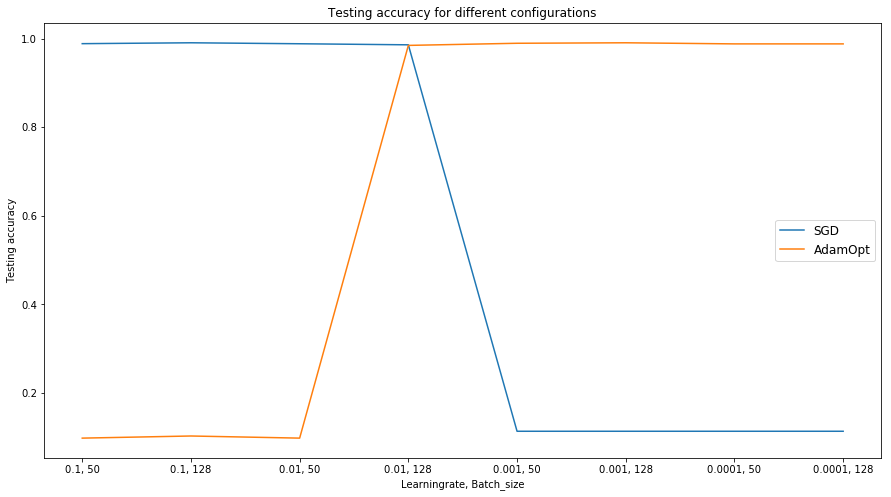

In [98]:
# Loading the data
fSGD = open('results_acc_test_SDG','rb')
fAdam = open('results_acc_test_Adam','rb')
SGD = pickle.load(fSGD)
Adam = pickle.load(fAdam)

# SGD = np.array([0.9885,0.9905, 0.9883, 0.9859, 0.1135, 0.1135, 0.1135, 0.1135])
# Adam = np.array([0.098, 0.1028, 0.098, 0.9846, 0.9894, 0.9905, 0.988, 0.988])


# Plot figure of testing accuracy for different configurations
plt.figure(figsize=(15,8))
plt.plot(range(len(SGD)),SGD,label='SGD')
plt.plot(range(len(Adam)),Adam,label='AdamOpt')
plt.xticks(range(len(SGD)),('0.1, 50', '0.1, 128', '0.01, 50', '0.01, 128', '0.001, 50', '0.001, 128', '0.0001, 50', 
                            '0.0001, 128'))
plt.xlabel('Learningrate, Batch_size')
plt.title('Testing accuracy for different configurations')
plt.legend(fontsize='large')
plt.ylabel('Testing accuracy')
plt.show()



<div style="background-color:#d9e6fc; padding:10px 15px 10px 15px;"> 
We can notice how the two optimization methods seem to be quite complementary: we are going to try to explain the reason of this behaviour.
<br>
<h4>AdamOpt</h4>
AdamOptimizer is an improved SGD optimizer, that uses the momentum to improve the performance of the simple SGD. The convergence of the Adam should be faster than the convergence of SGD. This is an advantage when we use a low learning rate, since with the momentum we can still achieve a consistent improvement of the accuracy without iterating over too many epochs. On the other hand, using a higher learning rate the Adam optimizer is taking too large steps which can result in bad performance. This is because sometimes, to reach the optimum, it is necessary to improve by taking small steps.  

<h4>SGD</h4>
Focusing on SGD the case is the opposite; even though we have a high learning rate the steps of improvement are not as big as with the Adam optimizer, because the momentum is not used. Therefore we are able to reach the optimum before the improvement in the accuracy is less than the threshold. With a lower learning rate we have steps that are too small to reach the optimum without having improvements less than the threshold: this results in the end of the training since the error is not decreasing significantly and it would take too much time to reach the optimum solution.<br><br><br>

Now we are studying the relation between the number of epochs and the training accuracy. 
</div>

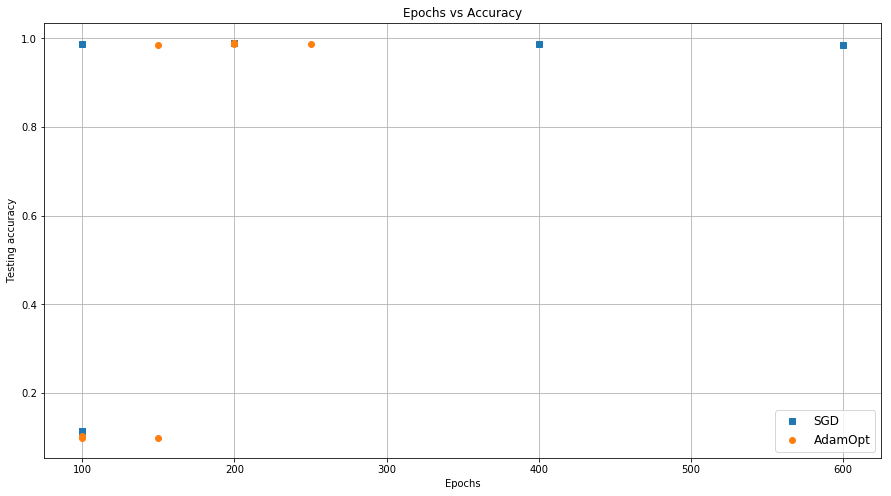

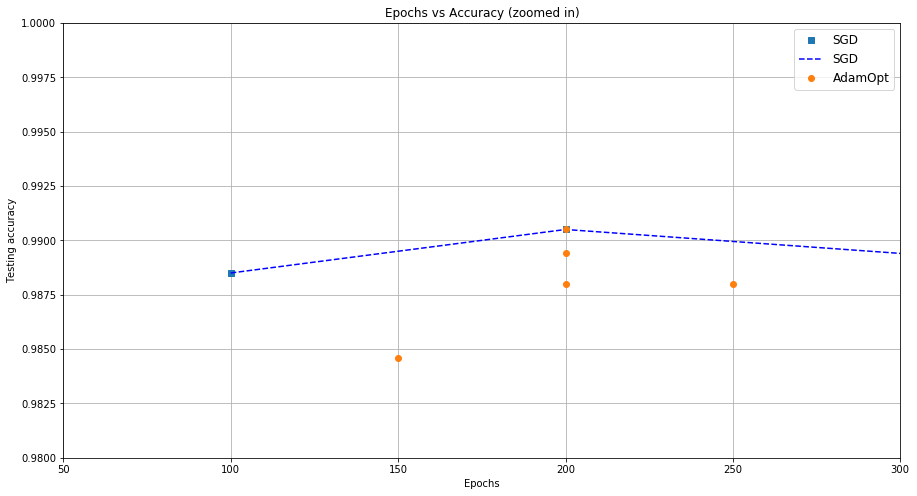

In [99]:
# Plot figure of testing accuracy vs epochs
plt.figure(figsize=(15,8))
plt.plot(SGD_iterations,SGD,'s',label='SGD')
plt.plot(Adam_iterations,Adam,'o',label='AdamOpt')
plt.grid()
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.legend(fontsize='large')
plt.ylabel('Testing accuracy')
plt.show()

# Plot figure of testing accuracy vs epochs - zoomed in
plt.figure(figsize=(15,8))
plt.plot(SGD_iterations,SGD,'s',SGD_iterations,SGD,'b--',label='SGD')
plt.plot(Adam_iterations,Adam,'o',label='AdamOpt')
plt.grid()
plt.xlim(50,300)
plt.ylim(0.98,1)
plt.title('Epochs vs Accuracy (zoomed in)')
plt.xlabel('Epochs')
plt.legend(fontsize='large')
plt.ylabel('Testing accuracy')
plt.show()

<div style="background-color:#d9e6fc; padding:10px 15px 10px 15px;"> 
The first figure above shows us an overview: we can notice how the SGD performs more iterations than AdamOpt overall. The interesting part of the graph is the upper left corner, since our goal is to have high accuracy and low number of iterations. <br><br>
In the second figure, that represents the upper left corner of the previous figure, there are a predominance of AdamOpt solutions. This means that overall the AdamOpt is faster than SGD, even though sometimes the performances are quite similar. <br><br>
<h4>Best solution choice</h4>
Given the assumptions above, we are chosing as best solution:
<ul>
<li>Optimizer: AdamOptimizer
<li>Learning Rate: 0.001
<li>Batch size: 128
<li>Activation function: sigmoid
</ul>
</div>

<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Update on Relu</font></h2>
</div>

<div style="background-color:#d9e6fc; padding:10px 15px 10px 15px;"> 
Before we said that the problem was the `tf.log` function. In order to solve this problem we acted as follow:
<ul>
<li>added the bias value of 1e-9 to the tf.log. Even though this is a really small value, it seems to be enough to avoid the NaN as output.
<li>focused on lower LRs. High LRs tend to make the model to converge too rapidly, and this could also be a cause for the NaN as output of tf.log
<li>decreased the display step. Before we said that having a display step of 50 epochs was a good choice, but in this case checking the improvements more oftenly (every 10), could avoid the model to reduce the loss too much ending up with NaN as output.
</ul>
</div>

In [100]:
ACT = tf.nn.relu
methods = ['GradientDescentOptimizer','AdamOptimizer']
for LR in [0.001,0.0001]:
    for BS in [50,128]:
        for i, OPT in enumerate([tf.train.GradientDescentOptimizer,tf.train.AdamOptimizer]):
            print('Train with \n\tLR:',LR,'\n\tbatch_size:',BS,'\n\topt method:',methods[i])
            train(learning_rate = LR, training_epochs = 200, 
                      batch_size = BS, display_step = 10, 
                      optimizer= OPT,
                      activation_func = ACT
                 )

In [101]:
SGD_iterations_relu = np.array([140, 100, 200, 200])
Adam_iterations_relu = np.array([20, 20, 30, 40])

SGD_relu = np.array([0.987, 0.9763, 0.9671, 0.9296])
Adam_relu = np.array([0.9885, 0.9852,  0.9863, 0.9873])

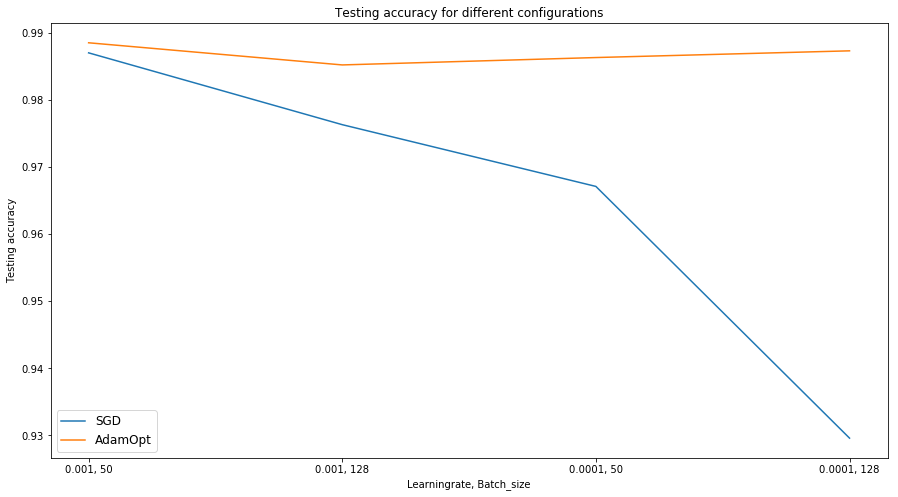

In [104]:
# Plot figure of testing accuracy for different configurations
plt.figure(figsize=(15,8))
plt.plot(range(len(SGD_relu)),SGD_relu,label='SGD')
plt.plot(range(len(Adam_relu)),Adam_relu,label='AdamOpt')
plt.xticks(range(len(SGD_relu)),('0.001, 50', '0.001, 128', '0.0001, 50', '0.0001, 128'))
plt.xlabel('Learningrate, Batch_size')
plt.title('Testing accuracy for different configurations')
plt.legend(fontsize='large')
plt.ylabel('Testing accuracy')
plt.show()

<div style="background-color:#d9e6fc; padding:10px 15px 10px 15px;"> 
Now we are comparing the testing accuracy for the two optimizers using the relu function. Notice that when we are comparing the results with the sigmoid case, we are referring only to the last part of the graph of the sigmoid (where the LR is equal to 0.001 and 0.0001).
<h4>AdamOpt</h4>
For the AdamOptimizer the behaviour is quite similiar as with the sigmoid (comparing the curve in the above figure with the curve in the sigmoid case), as it appears almost as a straight line with high testing accuracy. 
<h4>SGD</h4>
On the other hand, for the SGD the curve differs from the sigmoid case. The performance is significantly better with the relu function, as the testing accuracy is always greater than 90 percent. Comparing with the sigmoid case the accuracy was less than 30 percent.  
<br><br>

Now we are studying the relation between the number of epochs and the training accuracy. 
</div>

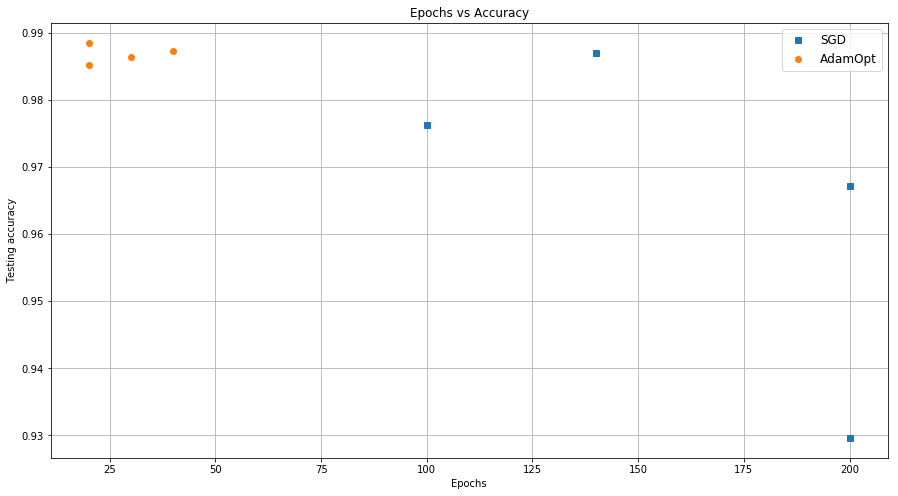

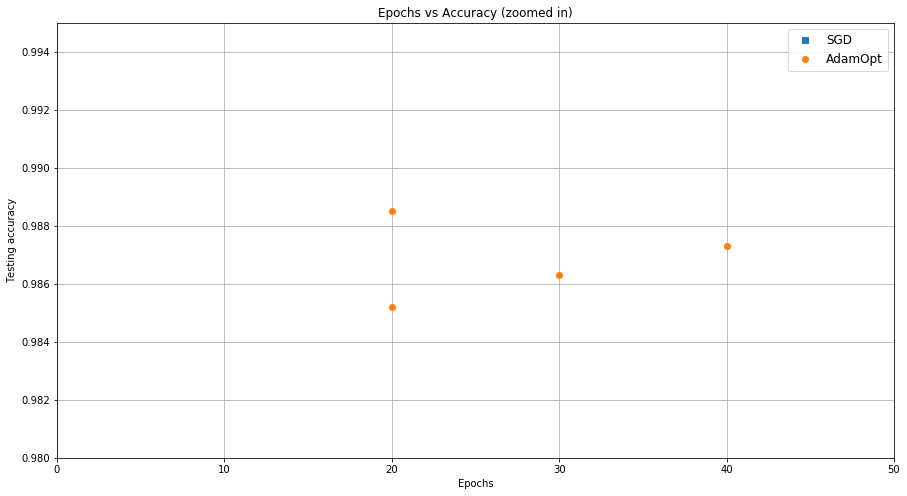

In [109]:
# Plot figure of testing accuracy vs epochs
plt.figure(figsize=(15,8))
plt.plot(SGD_iterations_relu,SGD_relu,'s',label='SGD')
plt.plot(Adam_iterations_relu,Adam_relu,'o',label='AdamOpt')
plt.grid()
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.legend(fontsize='large')
plt.ylabel('Testing accuracy')
plt.show()

# Plot figure of testing accuracy vs epochs - zoomed in
plt.figure(figsize=(15,8))
plt.plot(SGD_iterations_relu,SGD_relu,'s',label='SGD')
plt.plot(Adam_iterations_relu,Adam_relu,'o',label='AdamOpt')
plt.grid()
plt.xlim(0,50)
plt.ylim(0.98,0.9950)
plt.title('Epochs vs Accuracy (zoomed in)')
plt.xlabel('Epochs')
plt.legend(fontsize='large')
plt.ylabel('Testing accuracy')
plt.show()

<div style="background-color:#d9e6fc; padding:10px 15px 10px 15px;"> 
The first figure above shows us an overview: we can notice how the SGD performs still more iterations than AdamOptimizer overall. The interesting part of the graph is the upper left corner, as before, since our goal is to have high accuracy and low number of iterations. <br><br>
In the second figure, we are not even seeing SGD, even if its performances are good: the overall number of iteration is considerably greater than the iterations for the AdamOptimizer.<br><br>

Comparing with the sigmoid, we notice how the bad testing accuracy of SGD with lower LRs, is now not as bad as before. This is due to the fact that the combination of AdamOptimizer and relu function, is significantly faster than sigmoid, so even with low LRs SGD can reach optimum solutions not possible before. By looking at the results is clear how AdamOptimizer + relu is faster: with the same LR it takes only 20 iterations to reach almost the same accuracy instead of 200.

<h4>Best solution choice</h4>
Given the assumptions above, we are chosing as best solution:
<ul>
<li>Optimizer: AdamOptimizer
<li>Learning Rate: 0.001
<li>Batch size: 50
<li>Activation function: relu
</ul>
</div>

<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Conclusions</font></h2>
</div>

<div style="background-color:#d9e6fc; padding:10px 15px 10px 15px;"> 
We started analyzing the model using the sigmoid function, moving then to the relu function. We discovered that there were some problems with the relu function so we decided to continue the study with the sigmoid instead. <br><br>
Later on, after finding the cause of the problems with the relu function, we tried to solve them. We were then able to study also the model using the relu function and to obtain some results.
<h4>Results</h4>
We found out the best configuration for both sigmoid and relu. Even though the LR and batch size are quite similar in both cases, and the test accuracy differ not very much (0.9885 for relu and 0.9905 for sigmoid), the number of iterations needed to reach these results differ a lot:
<ul>
<li>20 iterations for relu
<li>200 iterations for sigmoid
</ul>
<br>
After noticing this, we can conclude relu is probably better: it is true that the accuracy is not as high as with sigmoid, but the huge difference in number of iterations must be taken into account. It is also possible that continuing the training after the 20 iterations for relu + AdamOptimizer, the accuracy will improve and will reach a value greater than the one reached with the sigmoid at 200 iterations.
</div>

<b> Question 2.2.2 </b>  What about applying a dropout layer on the Fully connected layer and then retraining the model with the best Optimizer and parameters(Learning rate and Batch size) obtained in *Question 2.2.1*  ? (probability to keep units=0.75). For this stage ensure that the keep prob is set to 1.0 to evaluate the 
performance of the network including all nodes.

<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Dropout implementation</font></h2>
</div>

<div style="background-color:#d9e6fc; padding:10px 15px 10px 15px;"> 
In order to create the fully-connected layers we used at first `tf.layers.dense` but since the last part requires dropout layers, we decided to use `tf.nn.dropuot` with a dropout value tunable by the user.
</div>

In [65]:
def LeNet5_Model_dropout(data, activation_function, dropout_prob): 

    ######## Convolutional Layer #1
    filter_shape_c1 = [5, 5, 1, 6]
    f_conv1 = weight_variable(filter_shape_c1)
    conv1 = tf.nn.conv2d(input=data, filter=f_conv1, strides=[1,1,1,1], padding="SAME")
    b1 = bias_variable([6])
    h1 = activation_function(tf.nn.bias_add(conv1,b1))
    
    ######### Pooling layer #1
    pooled1 = tf.nn.max_pool(h1,ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    ######### Convolutional Layer #2
    filter_shape_c2 = [5,5,6,16]
    f_conv2 = weight_variable(filter_shape_c2)
    conv2 = tf.nn.conv2d(pooled1, filter=f_conv2, strides=[1,1,1,1], padding="VALID")  
    b2 = bias_variable([16])
    h2 = activation_function(tf.nn.bias_add(conv2,b2))
    
    ######### Pooling layer #2
    pooled2 = tf.nn.max_pool(h2,ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    pooled2_flat = tf.reshape(pooled2, [-1, 5*5*16])
    
    ######### NN
    dense1 = tf.layers.dense(inputs=pooled2_flat, units=120, activation=activation_function)
    dense2 = tf.layers.dense(inputs=dense1, units=84, activation=activation_function)
    dense3 = tf.layers.dense(inputs=dense2, units=10, activation=tf.nn.softmax)
    
    return dense3

<div style="background-color:#d9e6fc; padding:10px 15px 10px 15px;"> 
In order to create the fully-connected layers we used at first `tf.layers.dense` but since the last part requires dropout layers, we decided to use `tf.nn.dropuot` with a dropout value tunable by the user.
</div>

<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h4><font color='white'>Dropout implementation with sigmoid</font></h4>
</div>

In [71]:
LR = 0.001
BS = 128
OPT = tf.train.AdamOptimizer
ACT = tf.nn.sigmoid
DO = 0.75

(test_acc, model) = train(learning_rate = LR, training_epochs = 1000,
                  batch_size = BS, display_step = 50,
                  optimizer= OPT, activation_func = ACT,drop_out=DO,model="LeNet5_Model_dropout")

Start Training!
Epoch:  50
		======> Loss: 0.000715560
		======> Training Accuracy: 0.999763608
		======> Validation Accuracy: 0.988399982
Epoch:  100
		======> Loss: 0.000001458
		======> Training Accuracy: 1.000000000
		======> Validation Accuracy: 0.990199983
Epoch:  150
		======> Loss: 0.000000002
		======> Training Accuracy: 1.000000000
		======> Validation Accuracy: 0.990400016
Epoch:  200
		======> Loss: 0.000000001
		======> Training Accuracy: 1.000000000
		======> Validation Accuracy: 0.989400029
Training Finished!
Testing Accuracy: 0.989


<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h4><font color='white'>Dropout implementation with relu</font></h4>
</div>

In [110]:
LR = 0.001
BS = 50
OPT = tf.train.AdamOptimizer
ACT = tf.nn.relu
DO = 0.75

(test_acc, model) = train(learning_rate = LR, training_epochs = 1000,
                  batch_size = BS, display_step = 50,
                  optimizer= OPT, activation_func = ACT,drop_out=DO,model="LeNet5_Model_dropout")

Start Training!
Epoch:  50
		======> Loss: 0.002769692
		======> Training Accuracy: 0.999563634
		======> Validation Accuracy: 0.988600016
Epoch:  100
		======> Loss: 0.000583176
		======> Training Accuracy: 0.999963641
		======> Validation Accuracy: 0.991199970
Epoch:  150
		======> Loss: 0.000000853
		======> Training Accuracy: 1.000000000
		======> Validation Accuracy: 0.992200017
Epoch:  200
		======> Loss: 0.000000000
		======> Training Accuracy: 1.000000000
		======> Validation Accuracy: 0.991599977
Training Finished!
Testing Accuracy: 0.9912


<div style="background-color:#d9e6fc; padding:10px 15px 10px 15px;"> 
Finally we can notice how the dropout layer is increasing the performance, since with the same LR we end up with a testing accuracy of 0.9912 instead of 0.9885. In addition the accuracy between the different epochs is greater than the threshold until epoch 150, that means faster convergence than before (it stopped at 20).<br><br>
Overall AdamOptimizer and relu seems to be the best solution as stated before.
</div>

<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Appendix</font></h2>
</div>

<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h4><font color='white'>Output for the study on sigmoid</font></h4>
</div>

Train with 
	LR: 0.1 
	batch_size: 50 
	opt method: GradientDescentOptimizer
Start Training!
Epoch:  50
		======> Loss: 0.020533105
		======> Training Accuracy: 0.994527280
		======> Validation Accuracy: 0.987999976
Epoch:  100
		======> Loss: 0.006300053
		======> Training Accuracy: 0.999145448
		======> Validation Accuracy: 0.987999976
Training Finished!
Testing Accuracy: 0.9885
Train with 
	LR: 0.1 
	batch_size: 50 
	opt method: AdamOptimizer
Start Training!
Epoch:  50
		======> Loss: 2.510366620
		======> Training Accuracy: 0.098981820
		======> Validation Accuracy: 0.095799997
Epoch:  100
		======> Loss: 2.510366538
		======> Training Accuracy: 0.098981820
		======> Validation Accuracy: 0.095799997
Training Finished!
Testing Accuracy: 0.098
Train with 
	LR: 0.1 
	batch_size: 128 
	opt method: GradientDescentOptimizer
Start Training!
Epoch:  50
		======> Loss: 0.052007290
		======> Training Accuracy: 0.984709084
		======> Validation Accuracy: 0.984799981
Epoch:  100
		======> Loss: 0.027302152
		======> Training Accuracy: 0.993036389
		======> Validation Accuracy: 0.988799989
Epoch:  150
		======> Loss: 0.016511174
		======> Training Accuracy: 0.995945454
		======> Validation Accuracy: 0.990000010
Epoch:  200
		======> Loss: 0.010413185
		======> Training Accuracy: 0.997854531
		======> Validation Accuracy: 0.990000010
Training Finished!
Testing Accuracy: 0.9905
Train with 
	LR: 0.1 
	batch_size: 128 
	opt method: AdamOptimizer
Start Training!
Epoch:  50
		======> Loss: 2.434893811
		======> Training Accuracy: 0.103909090
		======> Validation Accuracy: 0.109999999
Epoch:  100
		======> Loss: 2.426387098
		======> Training Accuracy: 0.103909090
		======> Validation Accuracy: 0.109999999
Training Finished!
Testing Accuracy: 0.1028
Train with 
	LR: 0.01 
	batch_size: 50 
	opt method: GradientDescentOptimizer
Start Training!
Epoch:  50
		======> Loss: 0.218949252
		======> Training Accuracy: 0.937218189
		======> Validation Accuracy: 0.945400000
Epoch:  100
		======> Loss: 0.085646465
		======> Training Accuracy: 0.974636376
		======> Validation Accuracy: 0.975000024
Epoch:  150
		======> Loss: 0.058329989
		======> Training Accuracy: 0.982945442
		======> Validation Accuracy: 0.982200027
Epoch:  200
		======> Loss: 0.045226733
		======> Training Accuracy: 0.987090886
		======> Validation Accuracy: 0.986000001
Epoch:  250
		======> Loss: 0.036999525
		======> Training Accuracy: 0.989509106
		======> Validation Accuracy: 0.987399995
Epoch:  300
		======> Loss: 0.031142471
		======> Training Accuracy: 0.991563618
		======> Validation Accuracy: 0.988200009
Epoch:  350
		======> Loss: 0.026645557
		======> Training Accuracy: 0.992890894
		======> Validation Accuracy: 0.988600016
Epoch:  400
		======> Loss: 0.023041757
		======> Training Accuracy: 0.993872702
		======> Validation Accuracy: 0.988600016
Training Finished!
Testing Accuracy: 0.9883
Train with 
	LR: 0.01 
	batch_size: 50 
	opt method: AdamOptimizer
Start Training!
Epoch:  50
		======> Loss: 0.010071924
		======> Training Accuracy: 0.997618198
		======> Validation Accuracy: 0.983799994
Epoch:  100
		======> Loss: 0.011482744
		======> Training Accuracy: 0.998145461
		======> Validation Accuracy: 0.985000014
Epoch:  150
		======> Loss: nan
		======> Training Accuracy: 0.098981820
		======> Validation Accuracy: 0.095799997
Training Finished!
Testing Accuracy: 0.098
Train with 
	LR: 0.01 
	batch_size: 128 
	opt method: GradientDescentOptimizer
Start Training!
Epoch:  50
		======> Loss: 2.279093485
		======> Training Accuracy: 0.113745451
		======> Validation Accuracy: 0.113200001
Epoch:  100
		======> Loss: 0.371635288
		======> Training Accuracy: 0.894254565
		======> Validation Accuracy: 0.898400009
Epoch:  150
		======> Loss: 0.177528474
		======> Training Accuracy: 0.947745442
		======> Validation Accuracy: 0.956399977
Epoch:  200
		======> Loss: 0.117651114
		======> Training Accuracy: 0.965836346
		======> Validation Accuracy: 0.970399976
Epoch:  250
		======> Loss: 0.090680798
		======> Training Accuracy: 0.972400010
		======> Validation Accuracy: 0.975199997
Epoch:  300
		======> Loss: 0.075643285
		======> Training Accuracy: 0.977436364
		======> Validation Accuracy: 0.977999985
Epoch:  350
		======> Loss: 0.065590657
		======> Training Accuracy: 0.980490923
		======> Validation Accuracy: 0.981199980
Epoch:  400
		======> Loss: 0.058536861
		======> Training Accuracy: 0.982890904
		======> Validation Accuracy: 0.981999993
Epoch:  450
		======> Loss: 0.052928812
		======> Training Accuracy: 0.984672725
		======> Validation Accuracy: 0.982599974
Epoch:  500
		======> Loss: 0.048446440
		======> Training Accuracy: 0.985909104
		======> Validation Accuracy: 0.983399987
Epoch:  550
		======> Loss: 0.044809774
		======> Training Accuracy: 0.986963630
		======> Validation Accuracy: 0.984200001
Epoch:  600
		======> Loss: 0.041603129
		======> Training Accuracy: 0.987818182
		======> Validation Accuracy: 0.984200001
Training Finished!
Testing Accuracy: 0.9859
Train with 
	LR: 0.01 
	batch_size: 128 
	opt method: AdamOptimizer
Start Training!
Epoch:  50
		======> Loss: 0.005259143
		======> Training Accuracy: 0.998000026
		======> Validation Accuracy: 0.983799994
Epoch:  100
		======> Loss: 0.005503182
		======> Training Accuracy: 0.998345435
		======> Validation Accuracy: 0.985199988
Epoch:  150
		======> Loss: 0.006329309
		======> Training Accuracy: 0.997581840
		======> Validation Accuracy: 0.984799981
Training Finished!
Testing Accuracy: 0.9846
Train with 
	LR: 0.001 
	batch_size: 50 
	opt method: GradientDescentOptimizer
Start Training!
Epoch:  50
		======> Loss: 2.300670705
		======> Training Accuracy: 0.112345457
		======> Validation Accuracy: 0.112599999
Epoch:  100
		======> Loss: 2.298852041
		======> Training Accuracy: 0.112345457
		======> Validation Accuracy: 0.112599999
Training Finished!
Testing Accuracy: 0.1135
Train with 
	LR: 0.001 
	batch_size: 50 
	opt method: AdamOptimizer
Start Training!
Epoch:  50
		======> Loss: 0.000190589
		======> Training Accuracy: 1.000000000
		======> Validation Accuracy: 0.990400016
Epoch:  100
		======> Loss: 0.000000865
		======> Training Accuracy: 1.000000000
		======> Validation Accuracy: 0.991800010
Epoch:  150
		======> Loss: 0.000000001
		======> Training Accuracy: 1.000000000
		======> Validation Accuracy: 0.992200017
Epoch:  200
		======> Loss: 0.000000002
		======> Training Accuracy: 1.000000000
		======> Validation Accuracy: 0.992200017
Training Finished!
Testing Accuracy: 0.9894
Train with 
	LR: 0.001 
	batch_size: 128 
	opt method: GradientDescentOptimizer
Start Training!
Epoch:  50
		======> Loss: 2.301300398
		======> Training Accuracy: 0.112345457
		======> Validation Accuracy: 0.112599999
Epoch:  100
		======> Loss: 2.301070018
		======> Training Accuracy: 0.112345457
		======> Validation Accuracy: 0.112599999
Training Finished!
Testing Accuracy: 0.1135
Train with 
	LR: 0.001 
	batch_size: 128 
	opt method: AdamOptimizer
Start Training!
Epoch:  50
		======> Loss: 0.002965795
		======> Training Accuracy: 0.998890936
		======> Validation Accuracy: 0.987800002
Epoch:  100
		======> Loss: 0.000001587
		======> Training Accuracy: 0.999981821
		======> Validation Accuracy: 0.989000022
Epoch:  150
		======> Loss: 0.000000038
		======> Training Accuracy: 1.000000000
		======> Validation Accuracy: 0.990199983
Epoch:  200
		======> Loss: 0.000000001
		======> Training Accuracy: 1.000000000
		======> Validation Accuracy: 0.990000010
Training Finished!
Testing Accuracy: 0.9905
Train with 
	LR: 0.0001 
	batch_size: 50 
	opt method: GradientDescentOptimizer
Start Training!
Epoch:  50
		======> Loss: 2.301142800
		======> Training Accuracy: 0.112345457
		======> Validation Accuracy: 0.112599999
Epoch:  100
		======> Loss: 2.301048367
		======> Training Accuracy: 0.112345457
		======> Validation Accuracy: 0.112599999
Training Finished!
Testing Accuracy: 0.1135
Train with 
	LR: 0.0001 
	batch_size: 50 
	opt method: AdamOptimizer
Start Training!
Epoch:  50
		======> Loss: 0.042549987
		======> Training Accuracy: 0.988036335
		======> Validation Accuracy: 0.986400008
Epoch:  100
		======> Loss: 0.017196894
		======> Training Accuracy: 0.995218158
		======> Validation Accuracy: 0.987999976
Epoch:  150
		======> Loss: 0.006057486
		======> Training Accuracy: 0.998672724
		======> Validation Accuracy: 0.989199996
Epoch:  200
		======> Loss: 0.001352784
		======> Training Accuracy: 0.999690890
		======> Validation Accuracy: 0.989000022
Training Finished!
Testing Accuracy: 0.988
Train with 
	LR: 0.0001 
	batch_size: 128 
	opt method: GradientDescentOptimizer
Start Training!
Epoch:  50
		======> Loss: 2.301158439
		======> Training Accuracy: 0.112345457
		======> Validation Accuracy: 0.112599999
Epoch:  100
		======> Loss: 2.301152768
		======> Training Accuracy: 0.112345457
		======> Validation Accuracy: 0.112599999
Training Finished!
Testing Accuracy: 0.1135
Train with 
	LR: 0.0001 
	batch_size: 128 
	opt method: AdamOptimizer
Start Training!
Epoch:  50
		======> Loss: 0.072918902
		======> Training Accuracy: 0.977599978
		======> Validation Accuracy: 0.978999972
Epoch:  100
		======> Loss: 0.037219385
		======> Training Accuracy: 0.989272714
		======> Validation Accuracy: 0.987600029
Epoch:  150
		======> Loss: 0.021984074
		======> Training Accuracy: 0.993636370
		======> Validation Accuracy: 0.987999976
Epoch:  200
		======> Loss: 0.012757969
		======> Training Accuracy: 0.997109115
		======> Validation Accuracy: 0.989799976
Epoch:  250
		======> Loss: 0.006774417
		======> Training Accuracy: 0.998981833
		======> Validation Accuracy: 0.989799976
Training Finished!
Testing Accuracy: 0.988

<div style="background-color:#327191; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h4><font color='white'>Output for the study on relu</font></h4>
</div>